<a href="https://colab.research.google.com/github/isoomni/Laptop4U/blob/master/tweets_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 전처리 for 워드클라우드

In [ ]:
pip install KoNLPy

In [ ]:
pip install pyperclip

In [ ]:
import numpy as np
import pandas as pd

from konlpy.tag import Okt
from wordcloud import WordCloud,STOPWORDS
from wordcloud import ImageColorGenerator


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_bitcoin/clean_tweets_df.csv')
df.head()

,Unnamed: 0,timestamp,review
0,0,2019-05-27 11:49:18+00,cardano digitize currencies eos https co ktkqk...
1,1,2019-05-27 11:49:06+00,another test tweet caught stream bitcoin
2,2,2019-05-27 11:49:22+00,current crypto prices btc usd eth usd ltc usd ...
3,3,2019-05-27 11:49:23+00,spiv nosar baz bitcoin asset amp currency http...
4,4,2019-05-27 11:49:25+00,nwoodfine building real bitcoin sv building br...


In [ ]:
# timestamp에 'en', null 값 제거
indexes = df[df['timestamp']=='en'].index
df = df.drop(index=indexes, axis=0)
df = df.dropna(how='any', axis=0)
df['timestamp'].unique()

array(['2019-05-27 11:49:18+00', '2019-05-27 11:49:06+00',
       '2019-05-27 11:49:22+00', ..., '2019-11-23 15:45:56+00',
       '2019-11-23 15:45:57+00', '2019-11-23 15:45:06+00'], dtype=object)

In [ ]:
# 시간 순서로 정렬
df.sort_values(by='timestamp')

,Unnamed: 0,timestamp,review
10143492,10143492,2007-04-19 07:14:38+00,happily mugging btc hook future rich lawyer bf...
14,14,2009-01-11 03:33:52+00,running bitcoin
4580370,4580370,2009-01-21 17:29:40+00,looking ways add anonymity bitcoin
4616565,4616565,2009-01-27 20:14:10+00,thinking reduce co emissions widespread bitcoi...
4663012,4663012,2009-01-29 13:37:53+00,satoshi nakamoto bitcoin v available
...,...,...,...
14583111,14583111,2019-11-23 15:45:53+00,worlds first millennium firm https co lqgie ak...
14583113,14583113,2019-11-23 15:45:55+00,daily profit hodling btc since data taken sinc...
14583115,14583115,2019-11-23 15:45:55+00,bitcoin suisse certificates https co ndabknotk
14583116,14583116,2019-11-23 15:45:56+00,register early access codugh api marketplace p...


In [ ]:
# 연월일로 열 생성
df['date'] = pd.to_datetime(df['timestamp'],format= '%Y-%m-%d').dt.date
df['date']

0           2019-05-27
1           2019-05-27
2           2019-05-27
3           2019-05-27
4           2019-05-27
               ...    
14583114    2019-11-23
14583115    2019-11-23
14583116    2019-11-23
14583117    2019-11-23
14583118    2019-11-23
Name: date, Length: 14575394, dtype: object

In [ ]:
df = df.reset_index(drop=True)
df = df[['date','review']]
df = df.sort_values(by='date')
df

,date,review
0,2007-04-19,happily mugging btc hook future rich lawyer bf...
1,2009-01-11,running bitcoin
2,2009-01-21,looking ways add anonymity bitcoin
3,2009-01-27,thinking reduce co emissions widespread bitcoi...
4,2009-01-29,satoshi nakamoto bitcoin v available
...,...,...
14557260,2019-11-23,market cap btc dominance btc eth btc xrp btc u...
14557259,2019-11-23,esax ieo technology
14557258,2019-11-23,register early access codugh api marketplace p...
14557256,2019-11-23,new bitcoin report block transactions usd tota...


In [ ]:
dataframe =df

In [ ]:
dataframe['date'] = dataframe['date'].astype(str)
dataframe['review'] = dataframe['review'].astype(str)

In [ ]:
df_done = dataframe[dataframe['date'].str.contains('2014-09|2014-10|2014-11|2014-12|2015|2016|2017|2018|2019')]

In [ ]:
df_done.to_csv('tweets_for_wordcloud.csv')

### 워드 클라우드

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_bitcoin/tweets_for_wordcloud.csv')
df.head()

,Unnamed: 0,date,review
0,286895,2014-09-01,utc h range volume btc
1,286893,2014-09-01,last mins arb opps spanning exchange pair yiel...
2,286894,2014-09-01,live profit buy b bitfinex sell vircurex bitco...
3,286891,2014-09-01,last mins arb opps spanning exchange pair yiel...
4,286892,2014-09-01,last mins arb opps spanning exchange pair yiel...


In [ ]:
df = df[['date','review']]
df

,date,review
0,2014-09-01,utc h range volume btc
1,2014-09-01,last mins arb opps spanning exchange pair yiel...
2,2014-09-01,live profit buy b bitfinex sell vircurex bitco...
3,2014-09-01,last mins arb opps spanning exchange pair yiel...
4,2014-09-01,last mins arb opps spanning exchange pair yiel...
...,...,...
14288933,2019-11-23,market cap btc dominance btc eth btc xrp btc u...
14288934,2019-11-23,esax ieo technology
14288935,2019-11-23,register early access codugh api marketplace p...
14288936,2019-11-23,new bitcoin report block transactions usd tota...


#### 2015-06 ~ 08 
2015년 8월 52주 신저가 갱신

In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

In [ ]:
df_de = df[df['date'].str.contains('2017-12')]

In [ ]:
# 불필요한 심볼을 없애고 문장 단위로 끊었다.
df_de = re.sub(r'[^\.\?\!\w\d\s]','',str(df_de['review'])) # 문장단위로 끊기
print(df_de)

897966     sign luno get idr worth bitcoin buy sell idr e...
897967     btc hr summary last high low change volume btc...
897968     past week bitcoin original cryptocurrency shot...
897969                btc loading pic twitter com rxumhiu ud
897970                                       tonight bitcoin
                                 ...                        
1136709    buy signal received dash trading btc rate date...
1136710    btcusd alert change open currently vs midnight...
1136711    live profit buy b bitfinex sell kraken bitcoin...
1136712    buy pm pdt price close stop gdax coinbase btc ...
1136713    buy signal received dash trading btc rate date...
Name review Length 238748 dtype object


In [ ]:
# 모두 소문자로 변환한다.
df_de = df_de.lower()

In [ ]:
# 각각의 워드를 토큰으로 쪼갠다.
word_tokens = nltk.word_tokenize(df_de)
print(word_tokens)

['897966', 'sign', 'luno', 'get', 'idr', 'worth', 'bitcoin', 'buy', 'sell', 'idr', 'e', '...', '897967', 'btc', 'hr', 'summary', 'last', 'high', 'low', 'change', 'volume', 'btc', '...', '897968', 'past', 'week', 'bitcoin', 'original', 'cryptocurrency', 'shot', '...', '897969', 'btc', 'loading', 'pic', 'twitter', 'com', 'rxumhiu', 'ud', '897970', 'tonight', 'bitcoin', '...', '1136709', 'buy', 'signal', 'received', 'dash', 'trading', 'btc', 'rate', 'date', '...', '1136710', 'btcusd', 'alert', 'change', 'open', 'currently', 'vs', 'midnight', '...', '1136711', 'live', 'profit', 'buy', 'b', 'bitfinex', 'sell', 'kraken', 'bitcoin', '...', '1136712', 'buy', 'pm', 'pdt', 'price', 'close', 'stop', 'gdax', 'coinbase', 'btc', '...', '1136713', 'buy', 'signal', 'received', 'dash', 'trading', 'btc', 'rate', 'date', '...', 'name', 'review', 'length', '238748', 'dtype', 'object']


In [ ]:
# 품사를 분리한다.
# 영어의 경우는 nltk에서 제공하는 pos_tag() 함수를 사용해서 품사 태깅을 할 수 있다
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)
print(tokens_pos)

[('897966', 'CD'), ('sign', 'NN'), ('luno', 'NN'), ('get', 'VBP'), ('idr', 'JJ'), ('worth', 'NN'), ('bitcoin', 'VB'), ('buy', 'NN'), ('sell', 'VB'), ('idr', 'JJ'), ('e', 'NN'), ('...', ':'), ('897967', 'CD'), ('btc', 'NN'), ('hr', 'NN'), ('summary', 'NN'), ('last', 'JJ'), ('high', 'JJ'), ('low', 'JJ'), ('change', 'NN'), ('volume', 'NN'), ('btc', 'NN'), ('...', ':'), ('897968', 'CD'), ('past', 'IN'), ('week', 'NN'), ('bitcoin', 'NN'), ('original', 'JJ'), ('cryptocurrency', 'NN'), ('shot', 'NN'), ('...', ':'), ('897969', 'CD'), ('btc', 'NN'), ('loading', 'VBG'), ('pic', 'NN'), ('twitter', 'NN'), ('com', 'NN'), ('rxumhiu', 'NN'), ('ud', 'JJ'), ('897970', 'CD'), ('tonight', 'NN'), ('bitcoin', 'NN'), ('...', ':'), ('1136709', 'CD'), ('buy', 'JJ'), ('signal', 'JJ'), ('received', 'VBN'), ('dash', 'JJ'), ('trading', 'NN'), ('btc', 'NN'), ('rate', 'NN'), ('date', 'NN'), ('...', ':'), ('1136710', 'CD'), ('btcusd', 'NN'), ('alert', 'NN'), ('change', 'NN'), ('open', 'JJ'), ('currently', 'RB'), ('v

In [ ]:
# 명사. 형용사 추출하기
# 명사는 NN을 포함하고 있음을 알 수 있음
NJ_words = []
for word, pos in tokens_pos:
    if 'NN' or 'JJ' in pos:
        NJ_words.append(word)
print(NJ_words)

['897966', 'sign', 'luno', 'get', 'idr', 'worth', 'bitcoin', 'buy', 'sell', 'idr', 'e', '...', '897967', 'btc', 'hr', 'summary', 'last', 'high', 'low', 'change', 'volume', 'btc', '...', '897968', 'past', 'week', 'bitcoin', 'original', 'cryptocurrency', 'shot', '...', '897969', 'btc', 'loading', 'pic', 'twitter', 'com', 'rxumhiu', 'ud', '897970', 'tonight', 'bitcoin', '...', '1136709', 'buy', 'signal', 'received', 'dash', 'trading', 'btc', 'rate', 'date', '...', '1136710', 'btcusd', 'alert', 'change', 'open', 'currently', 'vs', 'midnight', '...', '1136711', 'live', 'profit', 'buy', 'b', 'bitfinex', 'sell', 'kraken', 'bitcoin', '...', '1136712', 'buy', 'pm', 'pdt', 'price', 'close', 'stop', 'gdax', 'coinbase', 'btc', '...', '1136713', 'buy', 'signal', 'received', 'dash', 'trading', 'btc', 'rate', 'date', '...', 'name', 'review', 'length', '238748', 'dtype', 'object']


In [ ]:
# Lemmatization(원형(lemma) 찾기)
# 영어는 각 word의 원형을 찾는 기능을 활용할 수 있다. 원형을 찾아 같은 의미의 단어 토큰들을 하나의 값으로 인지하도록 한다. 자세한 내용은 아래 링크에서 확인할 수 있다.
# https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
# nltk에서 제공되는 WordNetLemmatizer을 이용
# ex) 명사의 경우는 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NJ_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['897966', 'sign', 'luno', 'get', 'idr', 'worth', 'bitcoin', 'buy', 'sell', 'idr', 'e', '...', '897967', 'btc', 'hr', 'summary', 'last', 'high', 'low', 'change', 'volume', 'btc', '...', '897968', 'past', 'week', 'bitcoin', 'original', 'cryptocurrency', 'shot', '...', '897969', 'btc', 'loading', 'pic', 'twitter', 'com', 'rxumhiu', 'ud', '897970', 'tonight', 'bitcoin', '...', '1136709', 'buy', 'signal', 'received', 'dash', 'trading', 'btc', 'rate', 'date', '...', '1136710', 'btcusd', 'alert', 'change', 'open', 'currently', 'v', 'midnight', '...', '1136711', 'live', 'profit', 'buy', 'b', 'bitfinex', 'sell', 'kraken', 'bitcoin', '...', '1136712', 'buy', 'pm', 'pdt', 'price', 'close', 'stop', 'gdax', 'coinbase', 'btc', '...', '1136713', 'buy', 'signal', 'received', 'dash', 'trading', 'btc', 'rate', 'date', '...', 'name', 'review', 'length', '238748', 'dtype', 'object']


In [ ]:
# nltk에서 제공하는 불용어 사전을 통해 사용하지 않을 단어를 제거할 수 있다. 불용어 기본 사전을 통해 1차 제거용으로 활용한다.
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NJ_words = set(lemmatized_words)
final_NJ_words = lemmatized_words

# 불용어 제거
for word in unique_NJ_words:
    if word in stopwords_list:
        while word in final_NJ_words: final_NJ_words.remove(word)



In [ ]:
# 3글자 이상만 추출
final_NJ_words = [e for e in final_NJ_words if len(e) >= 3]

In [ ]:
customized_stopwords = ['btc', 'min', "inr", "http", "dtype", "object", "bitcoin", "bit", "btce", "btcusd", "range", "average", "sell",
                        'volume', 'change', 'price', 'review', 'size', 'byte', 'gbtc','trend', 'cap', 'worth' ] # 직접 만든 불용어 사전

unique_NJ_words1 = set(final_NJ_words)
for word in unique_NJ_words1:
    if word in customized_stopwords:
        while word in final_NJ_words: final_NJ_words.remove(word)

print(final_NJ_words)

['897966', 'sign', 'luno', 'get', 'idr', 'buy', 'idr', '...', '897967', 'summary', 'last', 'high', 'low', '...', '897968', 'past', 'week', 'original', 'cryptocurrency', 'shot', '...', '897969', 'loading', 'pic', 'twitter', 'com', 'rxumhiu', '897970', 'tonight', '...', '1136709', 'buy', 'signal', 'received', 'dash', 'trading', 'rate', 'date', '...', '1136710', 'alert', 'open', 'currently', 'midnight', '...', '1136711', 'live', 'profit', 'buy', 'bitfinex', 'kraken', '...', '1136712', 'buy', 'pdt', 'close', 'stop', 'gdax', 'coinbase', '...', '1136713', 'buy', 'signal', 'received', 'dash', 'trading', 'rate', 'date', '...', 'name', 'length', '238748']


In [ ]:
# 빈도 분석
from collections import Counter
c = Counter(final_NJ_words) # input type should be a list of words (or tokens)
print(c)
k = 50
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'...': 9, 'buy': 5, 'idr': 2, 'signal': 2, 'received': 2, 'dash': 2, 'trading': 2, 'rate': 2, 'date': 2, '897966': 1, 'sign': 1, 'luno': 1, 'get': 1, '897967': 1, 'summary': 1, 'last': 1, 'high': 1, 'low': 1, '897968': 1, 'past': 1, 'week': 1, 'original': 1, 'cryptocurrency': 1, 'shot': 1, '897969': 1, 'loading': 1, 'pic': 1, 'twitter': 1, 'com': 1, 'rxumhiu': 1, '897970': 1, 'tonight': 1, '1136709': 1, '1136710': 1, 'alert': 1, 'open': 1, 'currently': 1, 'midnight': 1, '1136711': 1, 'live': 1, 'profit': 1, 'bitfinex': 1, 'kraken': 1, '1136712': 1, 'pdt': 1, 'close': 1, 'stop': 1, 'gdax': 1, 'coinbase': 1, '1136713': 1, 'name': 1, 'length': 1, '238748': 1})
[('...', 9), ('buy', 5), ('idr', 2), ('signal', 2), ('received', 2), ('dash', 2), ('trading', 2), ('rate', 2), ('date', 2), ('897966', 1), ('sign', 1), ('luno', 1), ('get', 1), ('897967', 1), ('summary', 1), ('last', 1), ('high', 1), ('low', 1), ('897968', 1), ('past', 1), ('week', 1), ('original', 1), ('cryptocurrency', 1)

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

noun_text = ''
for word in final_NJ_words:
    noun_text = noun_text +' '+word
noun_text

' 897966 sign luno get idr buy idr ... 897967 summary last high low ... 897968 past week original cryptocurrency shot ... 897969 loading pic twitter com rxumhiu 897970 tonight ... 1136709 buy signal received dash trading rate date ... 1136710 alert open currently midnight ... 1136711 live profit buy bitfinex kraken ... 1136712 buy pdt close stop gdax coinbase ... 1136713 buy signal received dash trading rate date ... name length 238748'

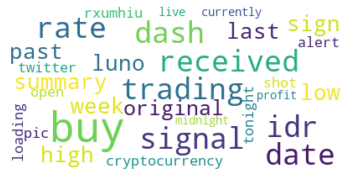

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color='white', relative_scaling=.5).generate(noun_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()